## DBSCAN Cluster from Airlines Data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Import Dataset
airline=pd.read_csv(R"\Users\ammaurya\Desktop\Data Science\Assignments\7-Clustering\EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
airline_norm=StandardScaler().fit_transform(airline)
airline_norm

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [6]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline_norm)

DBSCAN(eps=1, min_samples=4)

In [7]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [8]:
# Adding clusters to dataset
airline['clusters']=dbscan.labels_
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [9]:
airline.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1737.833052,177646.939292,899.406408,2.701518,1.062395,1.082631,39019.816189,21.784148,2120.370995,6.134907,4652.507589,0.686341
1,0,2178.729212,53148.905529,2.084023,1.660427,1.000000,1.000000,9033.232477,8.449717,116.498041,0.380932,3811.440139,0.000000
2,1,1799.892351,61006.745987,5.796034,2.605288,1.000000,1.000000,22850.425873,12.799811,245.526912,0.761095,4513.312559,1.000000
3,2,1382.750000,35251.500000,1058.750000,1.000000,1.000000,1.000000,1297.500000,1.250000,0.000000,0.000000,5047.250000,0.000000
4,3,1324.285714,65419.714286,0.000000,1.000000,1.000000,1.000000,6984.000000,11.571429,2905.571429,9.142857,5171.857143,1.000000
5,4,1363.000000,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
6,5,2557.230769,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
7,6,1830.500000,32730.750000,0.000000,1.000000,3.000000,1.000000,14267.750000,13.250000,62.500000,0.250000,4396.500000,0.000000
8,7,2672.000000,81738.000000,0.000000,1.000000,1.000000,1.000000,11860.750000,13.500000,1755.250000,9.500000,2807.250000,1.000000


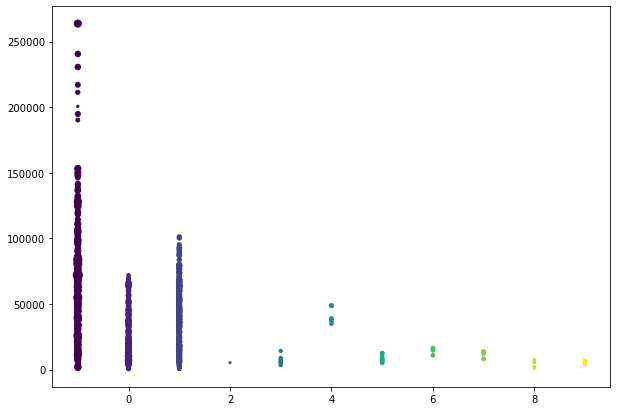

In [14]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline['clusters'],airline['Bonus_miles'],airline['Bonus_trans'], c=dbscan.labels_) 